<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/pov_render.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.0 MB/s eta 0:00:00


In [8]:
!sudo apt-get install povray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-povray libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  fonts-povray libsdl1.2debian povray povray-includes
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,739 kB of archives.
After this operation, 5,789 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-povray all 1:3.7.0.8-4build1 [65.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libsdl1.2debian amd64 1.2.15+dfsg2-5 [175 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 povray amd64 1:3.7.0.8-4build1 [1,275 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 povray-includes all 1:3.7.0.8-4build1 [223 kB]
Fetched 1,739 kB in 1s (1,208 kB/s)
debconf: unable to initialize f

cell=Cell([3.8, 3.8, 3.8]), a=3.7999999999999994
# atoms target=1200, actual 1229


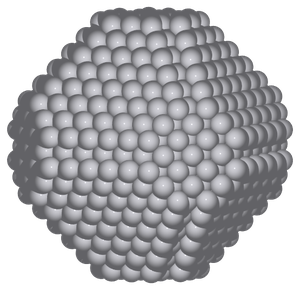

In [11]:
from ase.cluster import Decahedron, Icosahedron, Octahedron, wulff_construction
from ase.io import Trajectory
import pandas as pd
from ase.build import bulk
from ase.constraints import ExpCellFilter, StrainFilter
from ase.optimize import LBFGS
import numpy as np
from ase import Atoms
from ase.build import fcc111, add_adsorbate, bulk
from ase.io import read, write
from ase.io.pov import write_pov
from PIL import Image
from IPython.display import display

atoms_bulk = bulk("Pt", "fcc", a=3.8, cubic=True)
a = np.mean(np.diag(atoms_bulk.cell))
print(f"cell={atoms_bulk.cell}, a={a}")

def cluster2atoms(cluster):
    return Atoms(cluster.symbols, cluster.positions, cell=cluster.cell)

surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
esurf = [1.856, 1.681, 1.488]
lc = a
size=1200
Pt_3nm = wulff_construction("Pt", surfaces, esurf, size, "fcc", rounding="above", latticeconstant=lc)
print(f"# atoms target={size}, actual {len(Pt_3nm)}")

def render_and_display_np(structure, index, max_size=(100, 100)):
    renderer = write('{index}.pov', structure, rotation='20z,-85x')
    renderer.render()
    image_path = '{index}.png'
    img = Image.open(image_path)
    img.thumbnail(max_size, Image.LANCZOS)
    display(img)
render_and_display_np(Pt_3nm,'./output/ini',(300, 300))